<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q3_Salary_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!ls

salary_dataset.csv  sample_data


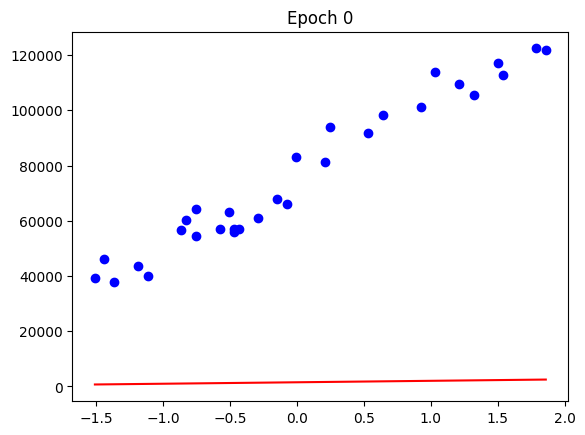

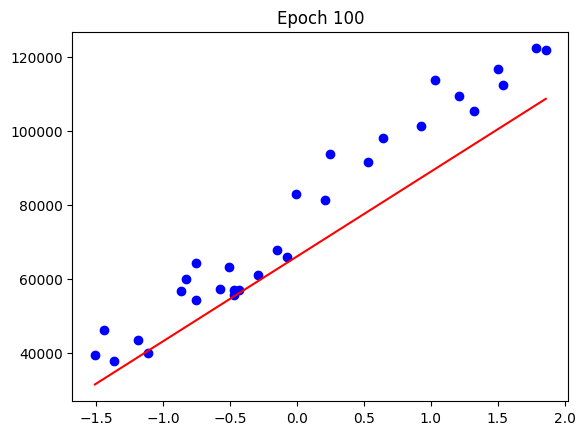

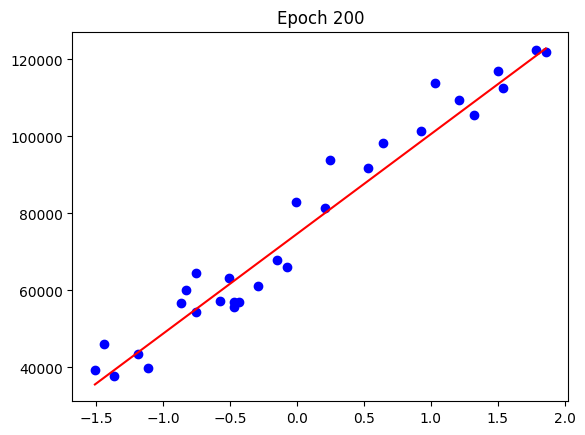

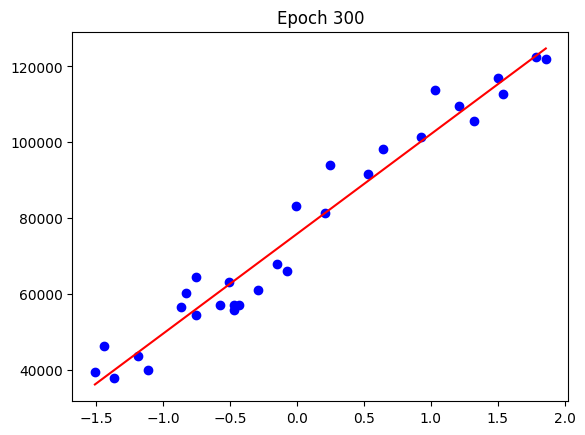

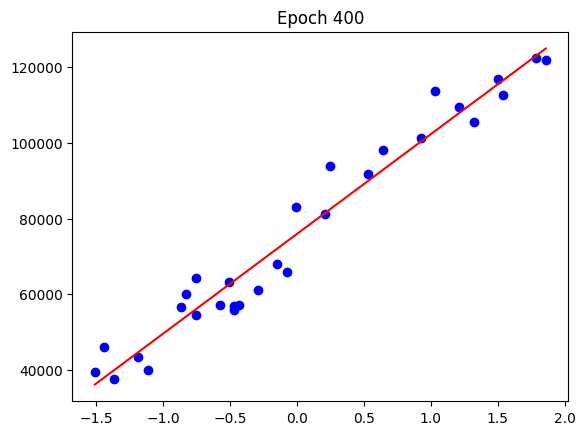

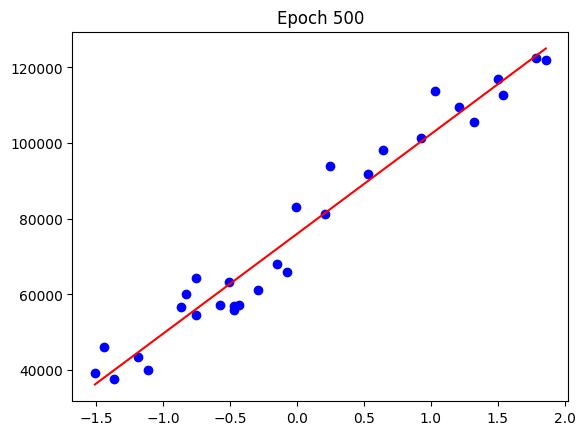

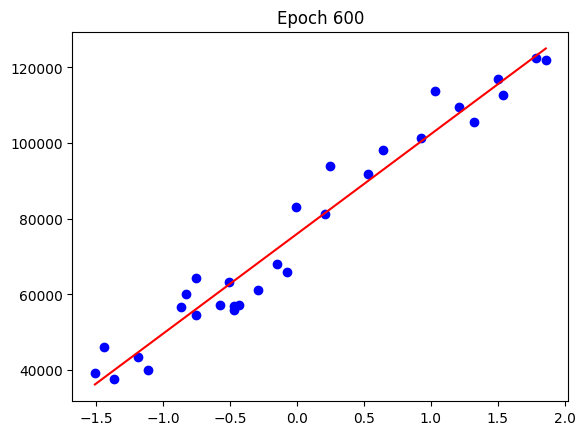

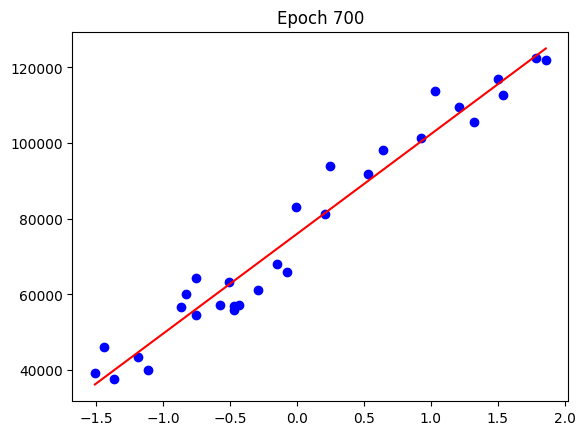

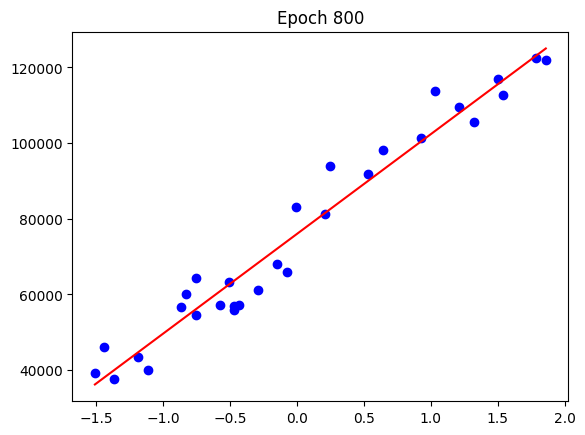

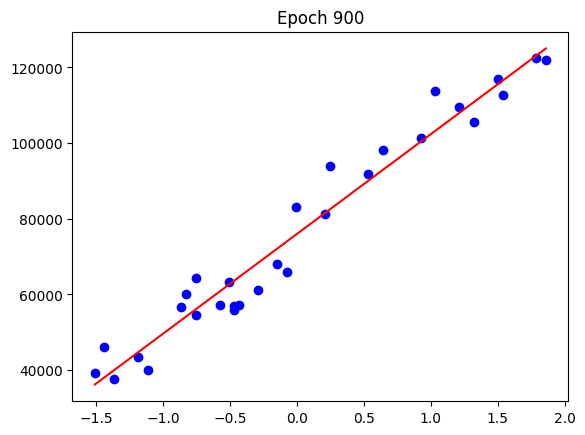

Theta: [76002.99987209 26367.18239917]
R² score: 0.9569566641435086


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

# Load data
with open('salary_dataset.csv', 'r') as f:
    data_string = f.read()

data = pd.read_csv(io.StringIO(data_string))

# Split the single column into two
data[['YearsExperience', 'Salary']] = data['YearsExperience,Salary'].str.split(',', expand=True)

# Convert the new columns to numeric
data['YearsExperience'] = pd.to_numeric(data['YearsExperience'])
data['Salary'] = pd.to_numeric(data['Salary'])


X = data['YearsExperience'].values
y = data['Salary'].values

# Normalize X for better convergence
X = (X - X.mean()) / X.std()

# Add intercept term
X_b = np.c_[np.ones((len(X),1)), X]  # X0 = 1
theta = np.random.randn(2)           # Random initialization

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
m = len(X)
for epoch in range(epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

    # Plot after every 100 epochs
    if epoch % 100 == 0:
        plt.scatter(X, y, color='blue')
        plt.plot(X, X_b.dot(theta), color='red')
        plt.title(f'Epoch {epoch}')
        plt.show()

# Final parameters
print("Theta:", theta)

# R² score
y_pred = X_b.dot(theta)
R2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2)) # Corrected R^2 formula
print("R² score:", R2)